# Performance of BinaryNet

In [1]:
% matplotlib inline

import os
import matplotlib.pyplot as plt

from scripts.utils import ExpResults

In [2]:
plotproperties = {'font.size': 13,
                  'axes.titlesize': 'xx-large',
                  'axes.labelsize': 'xx-large',
                  'xtick.labelsize': 'xx-large',
                  'xtick.major.size': 7,
                  'xtick.minor.size': 5,
                  'ytick.labelsize': 'xx-large',
                  'ytick.major.size': 7,
                  'ytick.minor.size': 5,
                  'legend.fontsize': 'xx-large',
                  'figure.figsize': (7, 6),
                  'savefig.dpi': 300,
                  'savefig.format': 'jpg'}

import matplotlib as mpl
mpl.rcParams.update(plotproperties)

## Parameters and definitions

In [3]:
log_dir = '/home/rbodo/.snntoolbox/data/cifar10'
runlabel_sign = log_dir + '/binarynet_sign/log/gui/02'
path_sign = os.path.join(log_dir, runlabel_sign)
runlabel_heaviside = log_dir + '/binarynet_heaviside/log/gui/01'
path_heaviside = os.path.join(log_dir, runlabel_heaviside)

scale = 1e3  # Scale from MOps to GOps

In [10]:
exp_sign = ExpResults(path_sign, 'sign', '.', scale=scale)
exp_heaviside = ExpResults(path_heaviside, 'Heaviside', '^', 'green', scale=scale)
experiments = [exp_sign, exp_heaviside]

## Plot error vs operations

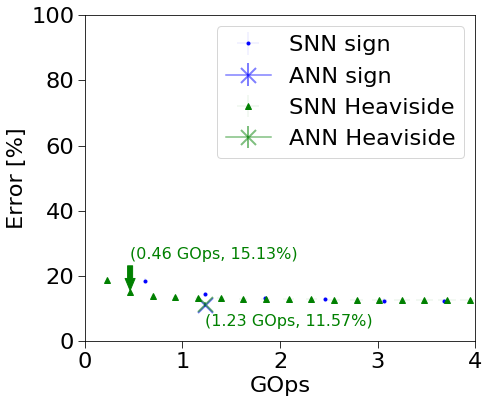

In [20]:
show_numbers = True

# plt.figure(figsize=(7, 5))

for exp in experiments:
    plt.errorbar(exp.mean_computations_t, exp.e1_mean, xerr=exp.std_computations_t,
                 yerr=exp.e1_confidence95, fmt=exp.marker, label='SNN '+exp.label, capsize=0, elinewidth=0.1, color=exp.color1)
    plt.errorbar(exp.operations_ann, exp.e1_ann, marker='x', label='ANN '+exp.label, color=exp.color1, markersize=15,
                 yerr=exp.e1_confidence95_ann, elinewidth=2, capthick=2, markeredgewidth=2, alpha=0.5)

exp = experiments[0]
if False:  # show_numbers:
    plt.annotate('({:.2f}, {:.2f})'.format(exp.operations_ann, exp.e1_ann), xy=(exp.operations_ann - 0.15, exp.e1_ann + 10), color=exp.color1)
    plt.annotate('({:.2f}, {:.2f})'.format(exp.op1_optimal, exp.e1_optimal), xy=(exp.op1_optimal, exp.e1_optimal),
                 xytext=(exp.op1_optimal, exp.e1_optimal + 10),
                 arrowprops=dict(color=exp.color1, shrink=0.05, width=5, headwidth=10), color=exp.color1)

exp = experiments[1]
if show_numbers:
    plt.annotate('({:.2f} GOps, {:.2f}%)'.format(exp.operations_ann, exp.e1_ann), xy=(exp.operations_ann, exp.e1_ann - 7), fontsize=16, color=exp.color1)
    plt.annotate('({:.2f} GOps, {:.2f}%)'.format(exp.op1_optimal, exp.e1_optimal), xy=(exp.op1_optimal, exp.e1_optimal),
                 xytext=(exp.op1_optimal, exp.e1_optimal + 10), fontsize=16,
                 arrowprops=dict(color=exp.color1, shrink=0.05, width=5, headwidth=10), color=exp.color1)

plt.xlim(0, 4)
plt.ylim(0, 100)
plt.ylabel('Error [%]')
plt.xlabel('GOps')
plt.legend(loc='upper right')
# plt.title('ANN vs SNN performance')
plt.savefig(os.path.join(log_dir, 'err_vs_ops'), bbox_inches='tight')

In [6]:
for exp in experiments:
    print(exp.label)
    print('ANN top-1:                         ({:.5f} GOps/frame, {:.2f} %)'.format(exp.operations_ann, exp.e1_ann))
    print('SNN top-1 best error:         ({:.5f} GOps/frame, {:.2f} %)'.format(exp.op1_0, exp.e1_0))
    print('SNN top-1 converged:        ({:.5f} GOps/frame, {:.2f} %)'.format(exp.op1_1, exp.e1_1))
    print('SNN top-1 jointly optimal:  ({:.5f} GOps/frame, {:.2f} %)'.format(exp.op1_optimal, exp.e1_optimal))
    print('SNN top-1 same op:           ({:.5f} GOps/frame, {:.2f} %)'.format(exp.op1_2, exp.e1_2))
    print('')

sign
ANN top-1:                         (1.23439 GOps/frame, 11.03 %)
SNN top-1 best error:         (18.40970 GOps/frame, 11.75 %)
SNN top-1 converged:        (3.06828 GOps/frame, 12.50 %)
SNN top-1 jointly optimal:  (1.22731 GOps/frame, 14.40 %)
SNN top-1 same op:           (1.84097 GOps/frame, 13.25 %)

Heaviside
ANN top-1:                         (1.23439 GOps/frame, 11.57 %)
SNN top-1 best error:         (6.02827 GOps/frame, 12.53 %)
SNN top-1 converged:        (1.15928 GOps/frame, 13.34 %)
SNN top-1 jointly optimal:  (0.46371 GOps/frame, 15.13 %)
SNN top-1 same op:           (1.39114 GOps/frame, 13.16 %)



In [5]:
print(experiments[1].mean_computations_t)
print(experiments[1].e1_mean)

[ 0.23185638  0.46371275  0.69556913  0.9274255   1.15928188  1.39113826
  1.62299463  1.85485101  2.08670738  2.31856376  2.55042014  2.78227651
  3.01413289  3.24598927  3.47784564  3.70970202  3.94155839  4.17341477
  4.40527115  4.63712752  4.8689839   5.10084027  5.33269665  5.56455303
  5.7964094   6.02826578  6.26012215  6.49197853  6.72383491  6.95569128]
[ 18.85  15.13  14.02  13.63  13.34  13.16  13.06  12.94  12.83  12.84
  12.78  12.73  12.71  12.68  12.67  12.61  12.61  12.58  12.58  12.58
  12.58  12.58  12.58  12.56  12.55  12.53  12.53  12.54  12.54  12.53]
